In [1]:
using PyPlot, LinearAlgebra, FFTW, Statistics, Arpack, Random

In [2]:
# cfs = -(fft((x->(4+cos(x))*cos(2*(2x+sin(x)))).((0:99)*2pi/100)))./(0:99)/im
# plot([dot(imag.(cfs)[2:9],sin.((1:8)*x)) for x in 0:0.01:2pi])

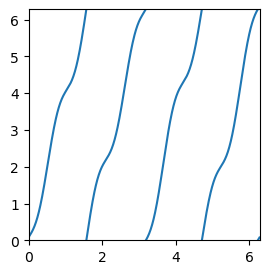

In [3]:
f̂(x) = 4x - 4sin(6x)/10+8cos(3x)/100#4x + 0.01sum(imag(cfs[i+1])*sin(i*x) for i = 1:10)#4x + (-7sin(x)+9sin(2x)-10sin(3x)+3sin(4x)+6sin(5x)+3sin(6x))/25#2x - 0.9sin(x)
f(x) = mod(f̂(x),2pi)
# function F(z) 
#     Fz = z^3 * exp((z+1/z)/(2im*2))
#     Fz / abs(Fz)
# end
figure(figsize=(3,3))
for i = 1:5
    plot(0:0.01:2pi,f̂.(0:0.01:2pi).-2(i-1)*pi,"C0")
end
# vlines(2pi*[0,0.375,0.625],[0,0,0],[2pi,2pi,2pi])
xlim(0,2pi);ylim(0,2pi)
gca().set_aspect("equal")

In [4]:
Ktrue = 125; biggridN = 10Ktrue
truepts = (2pi*(0:2biggridN-2))/(2biggridN-1)
LebTrans = [z^k for k = -Ktrue+1:Ktrue-1, z in cis.(f.(truepts))]
fft!(LebTrans,2)
LebTrans = LebTrans[:,[(2biggridN-1 .+(2-Ktrue:0));(1:Ktrue)]]/(2biggridN-1)
rhovals = eigvecs(LebTrans)[:,end]; 
rhovals /= rhovals[Ktrue]; rhovals = real.(rhovals)
rhowts = real.(ifft([rhovals[Ktrue:end];zeros(2biggridN-2Ktrue);rhovals[1:Ktrue-1]]))
W = Diagonal(rhowts);

In [5]:
eigvals_K = Array{Complex{Float64}}(undef,2Ktrue-1,Ktrue)
for K = 1:Ktrue
    Ψ0 = [z^k for k = -K+1:K-1, z in cis.(truepts)]
    Ψ1 = [z^k for k = -K+1:K-1, z in cis.(f.(truepts))]
    eigvals_K[:,K] = sort([zeros(2Ktrue-2K);eigvals((Ψ0*W*Ψ0') \ (Ψ0*W*Ψ1'))],by=abs)
end
trueeigs = sort(eigvals(LebTrans),by=abs)

249-element Vector{ComplexF64}:
    1.07588964720584e-16 + 2.014868074084556e-16im
   5.372278148365102e-16 - 6.302357724349018e-17im
  -4.832406506077483e-16 + 2.755823997944689e-16im
 -1.4875487421214522e-16 - 1.169999013006192e-15im
  -8.448052872416379e-16 + 9.568265228699362e-16im
 -1.2552498641325323e-15 - 2.622319542243445e-16im
   4.154834777526405e-15 + 5.774692904344509e-16im
  3.5512901577343143e-15 - 2.634361978458757e-15im
 -1.8115614010802814e-15 + 4.6487617554428136e-15im
  -4.077717236612343e-15 - 3.596569519488997e-15im
   9.448334990703167e-16 - 6.602835317764873e-15im
  3.1888278552907988e-15 - 5.961916357192952e-15im
  2.9796450007839198e-15 + 6.192309944438479e-15im
                         ⋮
   -0.060784990946303095 + 0.1465948651174873im
   -0.045848908079650086 - 0.2152373655139973im
   -0.045848908079658725 + 0.21523736551400716im
     0.08510757234082464 - 0.22525405952494257im
      0.0851075723408547 + 0.22525405952494496im
      0.2666713391252748 + 0.27406

In [8]:
println(trueeigs[end-22:end])

ComplexF64[0.02325728661894533 - 0.055411187842560106im, 0.023257286619812887 + 0.0554111878435698im, -0.06771551742727593 + 2.023313778364554e-12im, -0.07777574853933433 - 1.5588195175651896e-14im, 0.06904004584841164 + 0.08269950339013171im, 0.06904004584879178 - 0.08269950339012899im, -0.10736239942348605 - 0.021210687070175108im, -0.10736239942350832 + 0.021210687070793495im, -0.07875346917970841 + 0.08086415942618712im, -0.07875346918002832 - 0.08086415942632821im, -0.060784990946285505 - 0.1465948651173791im, -0.060784990946303095 + 0.1465948651174873im, -0.045848908079650086 - 0.2152373655139973im, -0.045848908079658725 + 0.21523736551400716im, 0.08510757234082464 - 0.22525405952494257im, 0.0851075723408547 + 0.22525405952494496im, 0.2666713391252748 + 0.2740610859724699im, 0.2666713391252775 - 0.27406108597247064im, 0.3756574220120707 - 0.2641152293839753im, 0.37565742201207336 + 0.26411522938397813im, 0.4690254980981256 + 0.1002226434474604im, 0.46902549809812594 - 0.100222643

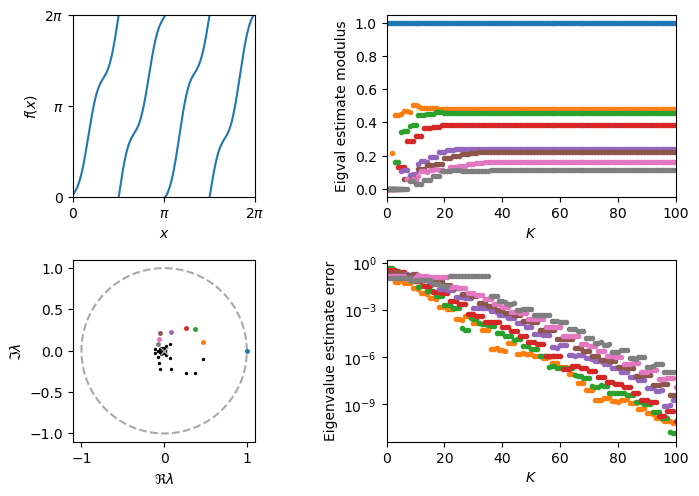

In [223]:
figure(figsize=(7,5))
subplot(222)
eigrange = 0:2:15
eigrange2 = eigrange[2:end]
plot(1:Ktrue,abs.(eigvals_K[end.-eigrange,:]'),".")
xlim(0,min(Ktrue,100))
xlabel("\$K\$");ylabel("Eigval estimate modulus")
subplot(224)
plot(0,NaN)
decayrange = 1:div(4Ktrue,5)
semilogy(decayrange,min.(abs.(eigvals_K[end.-eigrange2,decayrange] .- trueeigs[end.-eigrange2]),
    abs.(conj.(eigvals_K[end.-eigrange2,decayrange]) .- trueeigs[end.-eigrange2]))',".")
xlim(0,0.8Ktrue)
xlabel("\$K\$");ylabel("Eigenvalue estimate error")
tight_layout()

subplot(223)
scatter(reim(trueeigs)...,c="k",s=2)
trueeigs_col = reshape(trueeigs[end.-eigrange],1,length(eigrange))
plot(real(trueeigs_col),abs.(imag(trueeigs_col)),".",markersize=5)
plot(reim(cis.(0:0.01:2pi))...,"--",c="darkgray",zorder=1)
plot(0,0,"x",c="darkgray")
xlabel("\$\\Re \\lambda\$"); ylabel("\$\\Im \\lambda\$")
gca().set_aspect("equal")

subplot(221)
for i = 1:4
    plot(0:0.01:2pi,f̂.(0:0.01:2pi).-2(i-1)*pi,"C0")
end
# vlines(2pi*[0,0.375,0.625],[0,0,0],[2pi,2pi,2pi])
xticks([0,pi,2pi],["\$0\$","\$\\pi\$","\$2\\pi\$"])
yticks([0,pi,2pi],["\$0\$","\$\\pi\$","\$2\\pi\$"])
xlim(0,2pi);ylim(0,2pi)
xlabel("\$x\$");ylabel("\$f(x)\$")
gca().set_aspect("equal")
savefig("figures/circlemap.pdf")

## Eigenmodes

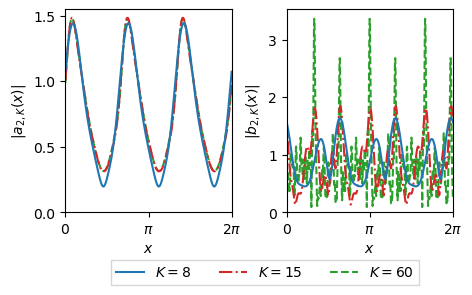

In [224]:
fig = figure(figsize=(5,3.5))
    fig.subplots_adjust(bottom=0.3, wspace=0.33)

leglines = Any[]
labels = String[]
for (col,K) = zip(("C2--","C3-.","C0-"),[60,15,8])
    Ψ0 = [z^k for k = -K+1:K-1, z in cis.(truepts)]
    Ψ1 = [z^k for k = -K+1:K-1, z in cis.(f.(truepts))]
    Koop = (Ψ0*W*Ψ0') \ (Ψ0*W*Ψ1')
    subplot(121)
    plot(truepts,abs.(Ψ0'*((Ψ0*W*Ψ0') \eigs(Koop',nev=3)[2][:,2])),col)
    subplot(122)
    push!(leglines,plot(truepts,abs.(Ψ0'*eigs(Koop,nev=3)[2][:,2]),col)[1])
    push!(labels,"\$K=$K\$")
end
subplot(121)
xlim(0,2pi);ylim(ymin=0);xlabel("\$x\$");ylabel("\$|a_{2,K}(x)|\$")
yticks(0:0.5:1.5);xticks([0,pi,2pi],["\$0\$","\$\\pi\$","\$2\\pi\$"])

subplot(122)
xlim(0,2pi);ylim(ymin=0);xlabel("\$x\$");ylabel("\$|b_{2,K}(x)|\$")
xticks([0,pi,2pi],["\$0\$","\$\\pi\$","\$2\\pi\$"])

subplot(121).legend(reverse(leglines),reverse(labels),loc="upper center", 
             bbox_to_anchor=(1.2, -0.2),fancybox=false, shadow=false, ncol=3)

# tight_layout()
savefig("figures/eigmodes.pdf")

## Data

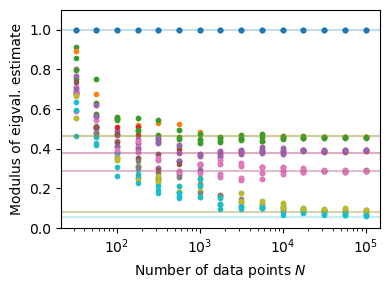

In [232]:
Ktst = 8; II = 10
Ns = round.(Int,10 .^(1.5:0.25:5))

figure(figsize=(4,3))
for rns = 1:4
    eigvals_NK = Array{Complex{Float64}}(undef,II,length(Ns))
    for (ind,N) in enumerate(Ns)
        xh = Array{Float64}(undef,N)
        x = rand(MersenneTwister(rns+1))#0.632412158928874
        for i = 1:1000
            x = f(x)
        end
        xh = Array{Float64}(undef,N+1)
        for i = 1:N
            x = f(x)
            xh[i] = x
        end
        Ψ0 = [z^k for k = -Ktst+1:Ktst-1, z in cis.(xh[1:N])]
        Ψ1 = [z^k for k = -Ktst+1:Ktst-1, z in cis.(xh[2:N+1])]
        Koop = (Ψ0'\Ψ1')
        eigvals_NK[:,ind] = reverse(sort(eigs(Koop,nev=II+2)[1][1:II],by=abs))
    end
    semilogx(repeat(Ns,1,II),abs.(eigvals_NK[1:II,:])',".")
end
xl = xlim()
plot(repeat([0 10^10],II,1)', repeat(abs.(eigvals_K[end:-1:end-II+1,Ktst]),1,2)',alpha=0.25)
xlim(xl)
ylim(0,1.1)
xlabel("Number of data points \$N\$")
ylabel("Modulus of eigval. estimate")
tight_layout()
savefig("figures/dataeig.pdf")

In [178]:
abs.(eigvals_K[:,Ktst])[end:-1:end-2Ktst+2]

15-element Vector{Float64}:
 1.000000000000003
 0.46259695106493975
 0.4625969510649393
 0.37910225182178653
 0.37910225182178625
 0.2883969889615779
 0.2883969889615775
 0.08162443312042703
 0.08162443312042691
 0.057907465297402
 0.05790746529740195
 0.047927135254043664
 0.04792713525404341
 0.04752412913237577
 0.047524129132375505